In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
data = pd.read_csv('https://raw.githubusercontent.com/dev-hid/dti/main/train_u6lujuX_CVtuZ9i%20(1).csv')

In [140]:
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [141]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [124]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [144]:
data ['LoanAmount'] = data['LoanAmount'].replace(np.NaN , data['LoanAmount'].mean())
data ['Loan_Amount_Term'] = data['Loan_Amount_Term'].replace(np.NaN , data['Loan_Amount_Term'].mean())

In [114]:
data.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [115]:
g=data.groupby('Property_Area')['Property_Area']

g.count()

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Property_Area, dtype: int64

In [145]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data['Married'] = data['Married'].map({'Yes':1, 'No':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})
data['Property_Area'] = data['Property_Area'].map({'Rural':1, 'Semiurban':0,'Urban':2})


In [146]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e59b7e198>,
      dtype=object)

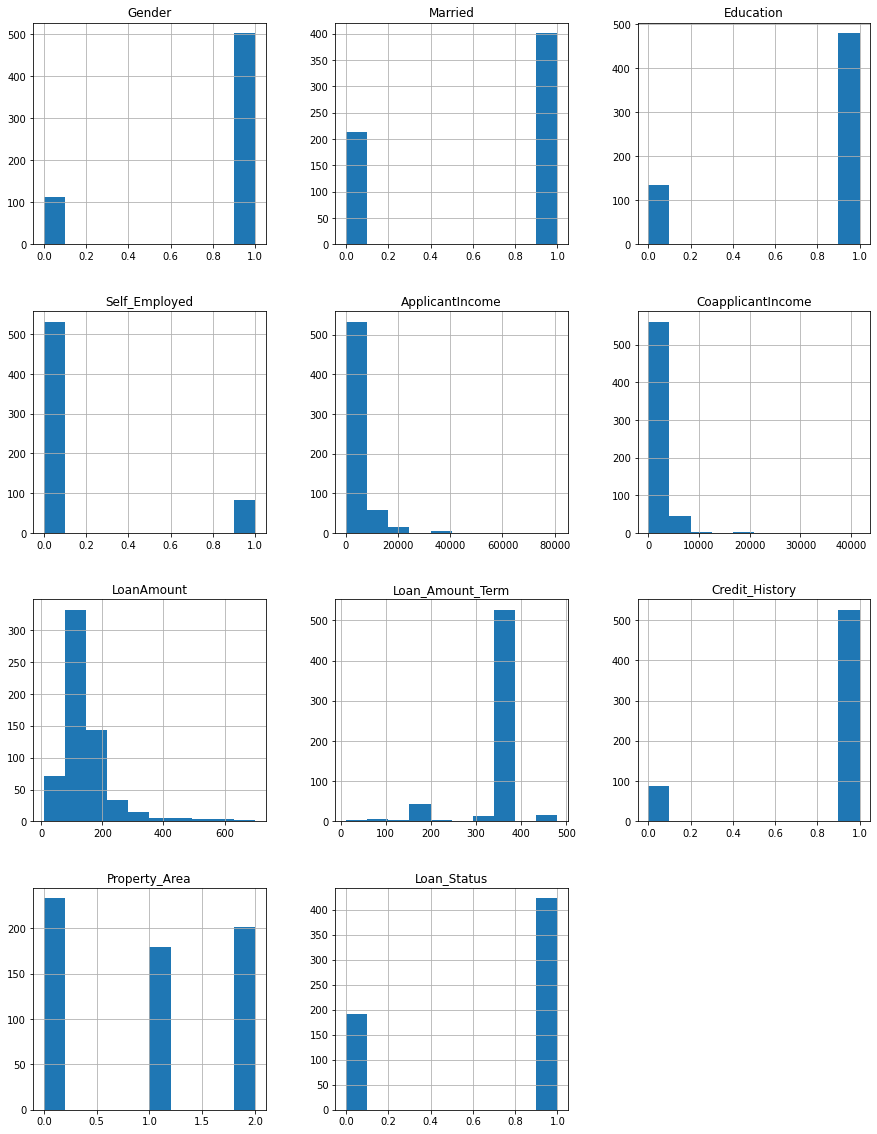

In [147]:
# data.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

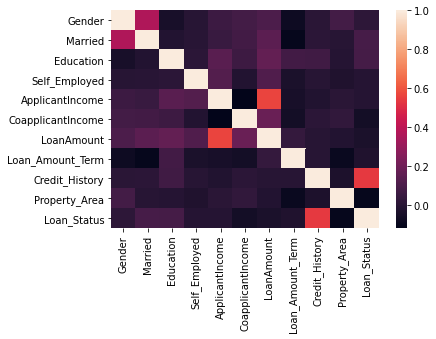

In [148]:
sns.heatmap(data.corr());

In [149]:
data.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.082045,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.003071,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,-0.003592,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.028356,-0.059187
LoanAmount,0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.013799,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.089508,-0.020974
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,-0.030248,0.540556
Property_Area,0.082045,-0.003071,-0.003592,-0.021996,0.007894,0.028356,-0.013799,-0.089508,-0.030248,1.000000,-0.103253


In [155]:

# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(data[['Dependents']]))
df_encoded.columns = encoder.get_feature_names(['Dependents'])

# Replace Categotical Data with Encoded Data
data.drop(['Dependents'] ,axis=1, inplace=True)
df_encoded= pd.concat([data, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,1.0,0.0,0.0,0.0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,0.0,1.0,0.0,0.0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,2,1,1.0,0.0,0.0,0.0
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,1.0,0.0,0.0,0.0
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,1.0,0.0,0.0,0.0
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0.0,0.0,0.0,1.0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1,0.0,1.0,0.0,0.0
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,2,1,0.0,0.0,1.0,0.0


In [150]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [156]:

# Loan Status
feature = data.drop(['Loan_Status'], axis=1)
feature.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613
Gender,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Married,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Education,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Self_Employed,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ApplicantIncome,5849.000000,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,3200.0,2500.0,3073.0,1853.0,1299.0,4950.0,3596.0,3510.0,4887.0,2600.0,7660.0,5955.0,2600.0,3365.0,3717.0,9560.0,2799.0,4226.0,1442.0,3750.0,4166.0,3167.0,4692.0,3500.0,12500.0,2275.000000,1828.0,3667.0,4166.0,3748.0,...,6406.0,3159.0,3087.0,3229.0,1782.0,3182.0,6540.0,1836.0,3166.0,1880.0,2787.0,4283.0,2297.0,2165.0,4750.0,2726.0,3000.0,6000.0,9357.0,3859.0,16120.0,3833.0,6383.0,2987.0,9963.0,5780.0,416.0,2894.0,5703.0,3676.0,12000.0,2400.000000,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.000000,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,700.0,1840.0,8106.0,2840.0,1086.0,0.0,0.0,0.0,0.0,3500.0,0.0,5625.0,1911.0,1917.0,2925.0,0.0,2253.0,1040.0,0.0,2083.0,3369.0,0.0,0.0,1667.0,3000.0,2067.000000,1330.0,1459.0,7210.0,1668.0,...,0.0,461.0,2210.0,2739.0,2232.0,2917.0,0.0,33837.0,0.0,0.0,1917.0,3000.0,1522.0,0.0,0.0,0.0,3416.0,0.0,0.0,3300.0,0.0,0.0,1000.0,0.0,0.0,0.0,41667.0,2792.0,0.0,4301.0,0.0,3800.000000,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,146.412162,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,70.0,109.0,200.0,114.0,17.0,125.0,100.0,76.0,133.0,115.0,104.0,315.0,116.0,112.0,151.0,191.0,122.0,110.0,35.0,120.0,201.0,74.0,106.0,114.0,320.0,146.412162,100.0,144.0,184.0,110.0,...,150.0,108.0,136.0,110.0,107.0,161.0,205.0,90.0,36.0,61.0,146.0,172.0,104.0,70.0,94.0,106.0,56.0,205.0,292.0,142.0,260.0,110.0,187.0,88.0,180.0,192.0,350.0,155.0,128.0,172.0,496.0,146.412162,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.000000,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,120.0,360.0,240.0,360.0,360.0,342.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.000000,342.0,360.0,360.0,360.0,...,360.0,84.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,84.0,360.0,360.0,360.0,360.0,180.0,240.0,360.0,180.0,360.0,360.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0,360.0,180.000000,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.

In [157]:

# Select Target
target = data['Loan_Status']
target


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [191]:

# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(429, 10)
(185, 10)
(429,)
(185,)


# Gaussian Naive-Bayes

In [162]:

# Import Module
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [163]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[ 27,  34],
       [  7, 117]])

In [164]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7783783783783784
Precision: 0.7748344370860927
Recall: 0.9435483870967742
F1 Score: 0.8509090909090908
Cohens Kappa Score: 0.43509346838459817


# Random Forest

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size=0.3)

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

185
0.8
0.9354838709677419
[[ 32  29]
 [  8 116]]
